In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

## Gathering

###### Enhanced Twitter Archive

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

###### Image Predictions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = 'image-predictions.csv'
with open(filename, 'wb') as f:
        f.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image-predictions.csv', sep='\t')

###### Additional Data via the Twitter API

In [5]:
# Use tweepy.py to gather the data and save it as tweet_json.txt
# %load tweepy.py

In [6]:
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

Another way parsing text file to dataframe on the student hub

```
import json
# Read the json of txt and put it into list
with open('tweet_json.txt', mode='r') as file:
    data = [json.loads(line) for line in file]
# Encode data into a json string and convert it to a dataframe
pd.read_json(json.dumps(data))
```

## Accessing

#### Tweet Json

In [7]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [8]:
tweet_json_df.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37750,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8226,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
# Entities which have been parsed out of the text of the Tweet
tweet_json_df.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [10]:
# When between one and four native photos or one video or one animated GIF are in Tweet, contains an array 'media' metadata
tweet_json_df.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [11]:
# The user who posted this Tweet
tweet_json_df.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7888923,
 'friends_count': 12,
 'listed_count': 6030,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 141227,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 9931,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/th

Check the missing data field

In [12]:
reply = tweet_json_df[tweet_json_df.in_reply_to_status_id_str.notnull()]

In [13]:
# check if entity missing data as well
reply.entities.values[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'NonWhiteHat',
   'name': 'Patrick Nonwhite',
   'id': 2281181600,
   'id_str': '2281181600',
   'indices': [0, 12]},
  {'screen_name': 'MayhewMayhem',
   'name': 'Мейхью Мейхем',
   'id': 38308544,
   'id_str': '38308544',
   'indices': [13, 26]}],
 'urls': []}

In [14]:
# check if extended eneity has no content
reply.extended_entities.values[0]

nan

In [15]:
reply.in_reply_to_user_id_str.values[0]

2281181600.0

In [16]:
# Whether to quote tweets
sum(tweet_json_df.is_quote_status)

31

In [17]:
tweet_json_df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [18]:
# the count of True
sum(tweet_json_df.favorited)

0

In [19]:
# the count of True
sum(tweet_json_df.retweeted)

0

In [20]:
# the count of True
sum(tweet_json_df.truncated)

0

In [21]:
# @WeRateDogs™ is 4196983835
tweet_json_df[tweet_json_df.user.str['id'] != 4196983835].shape

(0, 32)

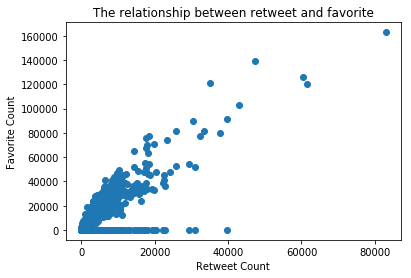

In [22]:
plt.scatter(tweet_json_df.retweet_count, tweet_json_df.favorite_count)
plt.title('The relationship between retweet and favorite')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()

#### Twitter Archive Enhance

In [23]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

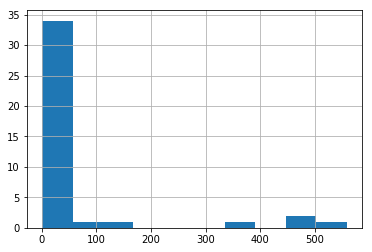

In [117]:
twitter_archive_df.rating_numerator.value_counts().hist()

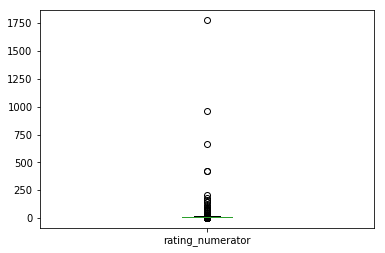

In [119]:
twitter_archive_df.rating_numerator.plot.box()

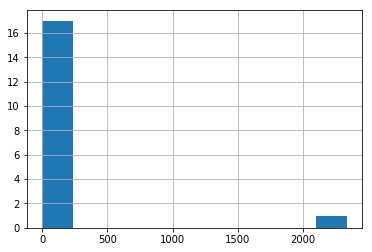

In [25]:
twitter_archive_df.rating_denominator.value_counts().hist()

Make sure the key associated with tweet_json_df and twitter_archive_df is id instead of id_str

In [26]:
tweet_json_df[['id', 'id_str']].head(1)

,id,id_str
0,892420643555336193,892420643555336192


In [27]:
print(sum(twitter_archive_df.tweet_id == 892420643555336193))
print(sum(twitter_archive_df.tweet_id == 892420643555336192))

1
0


In [28]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
twitter_archive_df[twitter_archive_df.tweet_id == 891327558926688256].expanded_urls.values

array(['https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'],
      dtype=object)

In [30]:
tweet_json_df[tweet_json_df.id == 891327558926688256].entities.values

array([{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}],
      dtype=object)

In [31]:
tweet_json_df[tweet_json_df.id == 891327558926688256].extended_entities.values

array([{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}, {'id': 891327551947157504, 'id_str': '891327551947157504', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type

In [121]:
twitter_archive_df[twitter_archive_df.tweet_id == 786709082849828864].index

Int64Index([695], dtype='int64')

In [150]:
# Confirm that the denominator and numerator of the data is correctly resolved
ratings = twitter_archive_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings[0] = pd.to_numeric(ratings[0])
ratings[1] = pd.to_numeric(ratings[1])
total = twitter_archive_df.shape[0]
print(total - sum(ratings[0] == twitter_archive_df.rating_numerator))
print(total - sum(ratings[1] == twitter_archive_df.rating_denominator))

6
0


In [137]:
twitter_archive_df.rating_numerator.dtype

dtype('int64')

In [250]:
# there are multiple dog stages in a row
twitter_archive_df.loc[(twitter_archive_df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].shape

(14, 17)

In [265]:
twitter_archive_df[~twitter_archive_df.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

#### Image Predictions

In [32]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
image_predictions_df.img_num.unique()

array([1, 4, 2, 3])

In [35]:
image_predictions_df.p1_dog.unique()

array([ True, False])

In [36]:
# View the number of forecasts that are all False
a = image_predictions_df[~image_predictions_df.p1_dog]
b = a[~a.p2_dog]
c = b[~b.p3_dog]
c.shape

(324, 12)

In [37]:
image_predictions_df[image_predictions_df.p1_dog & image_predictions_df.p2_dog].shape[0]

1398

###### Tweet Json

**Quality issues**

- Contributors, coordinates, geo have no data at all, so we don't consider these fields.
- extended_entities records attachment information. Without the data of this field, we can determine that the tweet does not have a picture, so we do not consider these data without pictures.
- in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str are the same group. When this message is a reply tweet, the related message will be recorded. Then we only consider the original tweet data, so the data is deleted in response to the tweet.
- maybe_sensitive, possible_sensitive_appealable Record sensitive information, I think these fields have little to do with this theme, so don't have to keep it.
- place Displays tweet location information, but only one pen, so this field is not retained.
- quoted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink are the same group. When the message is a quoted tweet, these fields will record the relevant information, just like we don't want the data.
- retweeted_status: Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. So as long as it is forwarded data, we don't want it.
- display_text_range indicates the range of text, without this field
- entities related information about the original tweets, because there is image prediction to find related image predictions, so this field is not used.
- favorited are all False, basically don't use this field.
- id_str type error, should be string object
- is_quote_status: Indicates whether this is a Quoted Tweet. So as long as it is True we don't want
- lang type error, should be category datatype
- source mixed html tag
- retweeted are False, don't use this field
- truncated are False, don't use this field
- user is the same account @WeRateDogs, this field can also be removed

###### Image Predictions

**Quality issues**

- There are 324 data to determine which dog breed

**Tidiness issues**
- There are three predictions in the data, which hides one field and the final result
- This information can be combined with the Twitter archive enhanced table to combine the best predicted results (dog breeds).

###### Twitter Archive Enhance

**Quality issues**

_missing data_
- in_reply_to_status_id, in_reply_to_user_id field information is also available in Tweet JSON, we can merge the table and then check if the data is a reply message, if it is deleted
- retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. The speculation is to forward the tweet id, which can be checked after the archive table and tweet json data are merged.
- expanded_urls, using Excel to view the content found that there are many duplicate urls, currently do not know why


_other_
- Erroneous datatypes: timestamp type should be changed to datetime
- source is the same source as the Tweet JSON, with the html tag language.
- There are 6 rating_numerator value wrong.
- Dog names not corrected, there are some value like ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

**Tidiness issues**
- rating_numerator, rating_denominator also hides a field message rating_numerator/rating_denominator can get a rough ratio
- Information about one type of observational unit (tweets) is spread across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.
- Dog stages should be a single column rather than four; one of the requirements for tidy data is that each variable forms a column.

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)


## Clean

### Tweet json

In [154]:
json_df = tweet_json_df.copy()

**Remove unwanted fields, contributors, coordinates, geo, possibly_sensitive, possible_sensitive_appealable, place, display_text_range, entities, favorited, retweeted, truncated, user**

_Define_

Use the `pandas` method `drop` above the field

_Code_

In [155]:
columns = ['contributors', 'coordinates', 'geo', 'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'display_text_range', 'entities', 'favorited', 'retweeted', 'truncated', 'user']
json_df.drop(columns, axis=1, inplace=True)

_Test_

In [156]:
json_df.columns

Index(['created_at', 'extended_entities', 'favorite_count', 'full_text', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'retweet_count', 'retweeted_status', 'source'],
      dtype='object')

**Remove extended_entities missing data**

_Define_

Leave the data that the extended_entities method notnull() is True

_Code_

In [157]:
json_df = json_df[json_df.extended_entities.notnull()]

_Test_

In [158]:
sum(json_df.extended_entities.isnull())

0

**Delete in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str data with value**

_Define_

Since these fields are information of the same group, leaving in_reply_to_status_id with no value data, other fields are processed together.

_Code_

In [159]:
json_df = json_df[json_df.in_reply_to_status_id.isnull()]

_Test_

In [160]:
# The result should be 0
print(json_df.in_reply_to_status_id.count(), 
      json_df.in_reply_to_user_id.count(),
      json_df.in_reply_to_screen_name.count(),
      json_df.in_reply_to_user_id.count(),
      json_df.in_reply_to_user_id_str.count())

0 0 0 0 0


**Delete data with is_quote_status to True**

_Define_

Leave is_quote_status as False data

_Code_

In [161]:
json_df = json_df[~json_df.is_quote_status]

_Test_

In [162]:
# The result should be 0
sum(json_df.is_quote_status)

0

**Delete retweeded_status with valued data**

_Define_

Leave the retweeted_status method `isnull()` to True for data

_Code_

In [163]:
json_df = json_df[json_df.retweeted_status.isnull()]

_Test_

In [164]:
# The result should be 0
sum(json_df.retweeted_status.notnull())

0

**Check the rest of the data and remove the fields without data**

_Define_

1. Use `info()` to see which fields have 0 data.
2. Use the `pandas` method `drop` to remove the field with 0 fields.

_Code_

In [165]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2338
Data columns (total 20 columns):
created_at                   1968 non-null datetime64[ns]
extended_entities            1968 non-null object
favorite_count               1968 non-null int64
full_text                    1968 non-null object
id                           1968 non-null int64
id_str                       1968 non-null int64
in_reply_to_screen_name      0 non-null object
in_reply_to_status_id        0 non-null float64
in_reply_to_status_id_str    0 non-null float64
in_reply_to_user_id          0 non-null float64
in_reply_to_user_id_str      0 non-null float64
is_quote_status              1968 non-null bool
lang                         1968 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
quoted_status_permalink      0 non-null object
retweet_count                1968 non-null int64
retweeted_st

In [166]:
columns = ['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted_status']
json_df = json_df.drop(columns, axis=1)

_Test_

In [167]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2338
Data columns (total 10 columns):
created_at           1968 non-null datetime64[ns]
extended_entities    1968 non-null object
favorite_count       1968 non-null int64
full_text            1968 non-null object
id                   1968 non-null int64
id_str               1968 non-null int64
is_quote_status      1968 non-null bool
lang                 1968 non-null object
retweet_count        1968 non-null int64
source               1968 non-null object
dtypes: bool(1), datetime64[ns](1), int64(4), object(4)
memory usage: 155.7+ KB


**Remove the is_quote_status, extended_entities field**

_Define_

Use `pandas` method `drop` columns

_Code_

In [168]:
json_df.drop(['is_quote_status', 'extended_entities'], axis=1, inplace=True)

_Test_

In [169]:
json_df.columns

Index(['created_at', 'favorite_count', 'full_text', 'id', 'id_str', 'lang',
       'retweet_count', 'source'],
      dtype='object')

**Correct id_str type is str datatype**

_Define_

Convert id_str to str datatype

_Code_

In [170]:
json_df.id_str = json_df.id_str.astype('str')

_Test_

In [171]:
json_df.id_str.dtype

dtype('O')

**Correct lang type is category datatype**

_Define_

Convert lang type to category datatype

_Code_

In [172]:
json_df.lang = json_df.lang.astype('category')

_Test_

In [173]:
json_df.lang.dtype

CategoricalDtype(categories=['en', 'et', 'eu', 'in', 'nl'], ordered=False)

**Trimming source content don't html info**

_Define_

1. Use `unique()` to list content
2. Use `replace()` to fix the content

_Code_

In [174]:
json_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [175]:
replace = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck',
}
json_df.source.replace(replace, inplace=True)

_Test_

In [176]:
json_df.source.unique()

array(['iPhone', 'Web Client', 'TweetDeck'], dtype=object)

### Twitter archive enhanced table

In [177]:
twitter_df = twitter_archive_df.copy()

**Merge Twitter archive enhanced table and Tweet json table**

_Define_
1. Create a new dataframe with the compiled json table, with ['id', 'favorite_count', 'lang', 'retweet_count', 'source']
2. Rename the new json dataframe field id to tweet_id
3. twitter archive enhanced Remove duplicate fields source, timestamp and create new dataframe `archive_df`
4. Combine the dataframes obtained in steps 2 and 3 using `pandas` method `merge`

_Code_

In [178]:
json_df = json_df[['id', 'favorite_count', 'lang', 'retweet_count', 'source', 'created_at']]
json_df.rename(columns={'id': 'tweet_id'}, inplace=True)
twitter_df.drop(['source', 'timestamp'], axis=1, inplace=True)
twitter_df = pd.merge(twitter_df, json_df, on=['tweet_id'])

_Test_

In [179]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,lang,retweet_count,source,created_at
0,892420643555336193,NaN,NaN,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37750,en,8226,iPhone,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32434,en,6079,iPhone,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,24430,en,4023,iPhone,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,41088,en,8371,iPhone,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,39282,en,9082,iPhone,2017-07-29 16:00:24


**Use info to check the information after the merger. If there is no data in the field, you can remove it directly**

_Code_

In [180]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 20 columns):
tweet_id                      1968 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
text                          1968 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1968 non-null object
rating_numerator              1968 non-null int64
rating_denominator            1968 non-null int64
name                          1968 non-null object
doggo                         1968 non-null object
floofer                       1968 non-null object
pupper                        1968 non-null object
puppo                         1968 non-null object
favorite_count                1968 non-null int64
lang                          1968 non-null category
retweet_count                 1968 non-

In [181]:
twitter_df = twitter_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

_Test_

In [182]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 15 columns):
tweet_id              1968 non-null int64
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
name                  1968 non-null object
doggo                 1968 non-null object
floofer               1968 non-null object
pupper                1968 non-null object
puppo                 1968 non-null object
favorite_count        1968 non-null int64
lang                  1968 non-null category
retweet_count         1968 non-null int64
source                1968 non-null object
created_at            1968 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(5), object(8)
memory usage: 232.7+ KB


**Incorrect values in rating numerators**

_Define_

1. Re-extract text to get the correct numerators
2. Covert datatype as numeric

_Code_

In [193]:
# Confirm that the denominator and numerator of the data is correctly resolved
ratings = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_df.rating_numerator = pd.to_numeric(ratings[0]).loc[:]
twitter_df.rating_denominator = pd.to_numeric(ratings[1]).loc[:]

_Test_

In [194]:
twitter_df[twitter_df.tweet_id == 786709082849828864].rating_numerator == 9.75

498    True
Name: rating_numerator, dtype: bool

**calculate rating_numerator / rating_denominator and put it in a new field rating_ratio**

_Define_

1. Calculate rating ratio
2. Remove rating_numerator, rating_denominator

_Code_

In [195]:
twitter_df['rating_ratio'] = twitter_df.rating_numerator / twitter_df.rating_denominator

In [196]:
twitter_df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

_Test_

In [198]:
twitter_df.head()

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,lang,retweet_count,source,created_at,rating_ratio
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,37750,en,8226,iPhone,2017-08-01 16:23:56,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,32434,en,6079,iPhone,2017-08-01 00:17:27,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,24430,en,4023,iPhone,2017-07-31 00:18:03,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,41088,en,8371,iPhone,2017-07-30 15:58:51,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,39282,en,9082,iPhone,2017-07-29 16:00:24,1.2


**Dog stages should be a single column rather than four**

_Define_

1. Put value of columns doogo, floofer, pupper, puppo together and store the value in new column 'stage'
2. Get unique value via `unique`
3. Correct the column stage value
4. Drop columns doogo, floofer, pupper, puppo

_Code_

In [227]:
twitter_df['stage'] = twitter_df.doggo + twitter_df.floofer + twitter_df.pupper + twitter_df.puppo
twitter_df.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [228]:
twitter_df.loc[twitter_df.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
twitter_df.loc[twitter_df.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
twitter_df.loc[twitter_df.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
twitter_df.loc[twitter_df.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
twitter_df.loc[twitter_df.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
twitter_df.loc[twitter_df.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo, puppo'
twitter_df.loc[twitter_df.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
twitter_df.loc[twitter_df.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'

In [232]:
twitter_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

_Test_

In [231]:
twitter_df.stage.value_counts()

None             1665
pupper            201
doggo              63
puppo              22
doggo,pupper        8
floofer             7
doggo, puppo        1
doggo,floofer       1
Name: stage, dtype: int64

In [234]:
twitter_df.columns

Index(['tweet_id', 'text', 'expanded_urls', 'name', 'favorite_count', 'lang',
       'retweet_count', 'source', 'created_at', 'rating_ratio', 'stage'],
      dtype='object')

**Correct dog name**

_Define_

1. Find out which names are in the list ['such', 'a', 'quite', 'my', 'his', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']
2. Change the value to None
3. Fix other lowercase names with title()

_Code_

In [282]:
bad_names = ['such', 'a', 'quite', 'my', 'his', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']
twitter_df.name = twitter_df.name.map(lambda x: 'None' if x in bad_names else x)

In [285]:
twitter_df.name = twitter_df.name.str.title()

_Test_

In [286]:
twitter_df[~twitter_df.name.str.istitle()].name.unique()

array([], dtype=object)

#### Image prediction table

In [287]:
prediction_df = image_predictions_df.copy()

**Delete data for no variety (a total of 324)**

_Define_

Leave one of p3_dog, p2_dog, p1_dog with True

_Code_

In [288]:
prediction_df = prediction_df[prediction_df.p1_dog | prediction_df.p2_dog | prediction_df.p3_dog]

_Test_

In [239]:
prediction_df[~prediction_df.p1_dog & ~prediction_df.p2_dog & ~prediction_df.p3_dog].shape[0]

0

In [240]:
image_predictions_df.shape[0] - prediction_df.shape[0]

324

**Find the dog breed according to the priority of the forecast and put it in the new open field breed**

_Define_

1. Create a function processing logic
     - when p1_dog is True then return p1
     - else if when p2_dog is True then return p2
     - else if when p3_dog is True then return p3
2. Call function with dataframe.apply and put the result in the new field `breed`
3. keep columns tweet_id, breed

_Code_

In [241]:
def prediction_integration(s):
    if s.p1_dog:
        return s.p1
    elif s.p2_dog:
        return s.p2
    else:
        return s.p3

In [289]:
prediction_df['breed'] = prediction_df.apply(prediction_integration, axis=1)

In [290]:
prediction_df = prediction_df[['tweet_id', 'breed']]

_Test_

In [244]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id    1751 non-null int64
breed       1751 non-null object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


**Merge with Twitter archive enhanced table**

_Define_

Use `pandas` method `merge` to merge prediction_df and archive_df

_Code_

In [291]:
master_df = pd.merge(twitter_df, prediction_df, on='tweet_id')

_Test_

In [327]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 12 columns):
tweet_id          1663 non-null object
text              1663 non-null object
expanded_urls     1663 non-null object
name              1663 non-null object
favorite_count    1663 non-null int64
lang              1663 non-null category
retweet_count     1663 non-null int64
source            1663 non-null object
created_at        1663 non-null object
rating_ratio      1663 non-null float64
stage             1663 non-null object
breed             1663 non-null object
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 157.7+ KB


## Storing

In [293]:
# Storing data as csv file
master_df.to_csv('twitter_archive_master.csv', index=False)

```
# Storing data to SqlLite
import sqlite3
# sqlite has no type of datetime, so we need to convert created_at to str type
master_df.created_at = master_df.created_at.astype('str')

with sqlite3.connect("homework.sqlite3") as conn:
    command = '''INSERT INTO TwitterMaster(tweet_id, text, expanded_urls, name, favorite_count, lang, retweet_count, source, created_at, rating_ratio, stage, breed)
                VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''
    for item in master_df.values:
        conn.execute(command, tuple(item))
    conn.commit()```

## Analyze

In [294]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 12 columns):
tweet_id          1663 non-null int64
text              1663 non-null object
expanded_urls     1663 non-null object
name              1663 non-null object
favorite_count    1663 non-null int64
lang              1663 non-null category
retweet_count     1663 non-null int64
source            1663 non-null object
created_at        1663 non-null datetime64[ns]
rating_ratio      1663 non-null float64
stage             1663 non-null object
breed             1663 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 157.7+ KB


Because tweet_id is nominal data, so make a transformation

In [295]:
master_df.tweet_id = master_df.tweet_id.astype('str')

In [296]:
# How many varieties are there in the data?
print(master_df.breed.unique().shape[0])
# The highest variety evaluated by @WeRateDogs
master_df[master_df.rating_ratio == master_df.rating_ratio.max()].breed

113


344    golden_retriever
Name: breed, dtype: object

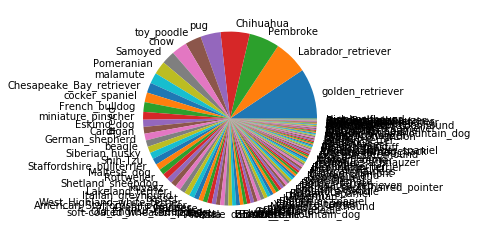

In [297]:
# Look at the most popular varieties of @WeRateDog with a pie chart
master_df.breed.value_counts().plot(kind='pie')
plt.show()

In [298]:
master_df.describe()

,favorite_count,retweet_count,rating_ratio
count,1663.000000,1663.000000,1663.000000
mean,9035.465424,2689.242934,1.082478
std,13226.530389,4871.254705,0.188374
min,77.000000,11.000000,0.000000
25%,2059.000000,599.000000,1.000000
50%,4223.000000,1343.000000,1.100000
75%,11181.500000,3039.000000,1.200000
max,162992.000000,82894.000000,3.428571


From the `describe()` result, the rating_ratio std is relatively small, and we are also curious about a question: Is there a strict range for the @WeRateDog score?

The following is a box diagram to see the distribution of data.

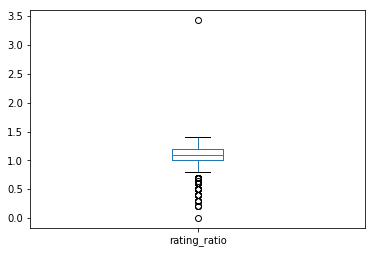

In [299]:
master_df.rating_ratio.plot.box()
plt.show()

The outliers are so much, the information is very scattered, and the conclusion is that the @WeRateDog score is very arbitrary.

Next I want to see if family count, retweet count, rating ratio are related to each other?

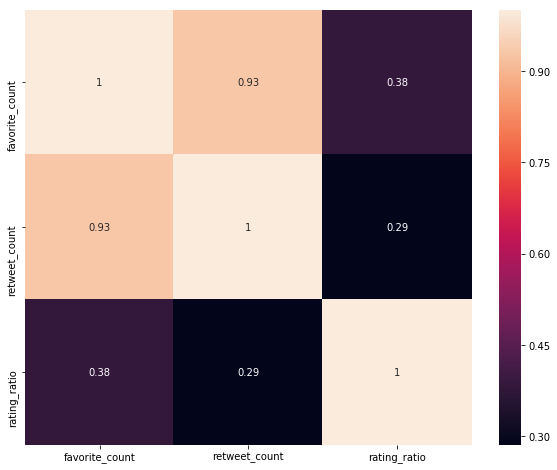

In [300]:
# Use seaborn's heat map to observe linear correlations between characterizations
plt.figure(figsize=(10, 8))
feature_corr = master_df.corr()
sns.heatmap(feature_corr, annot=True)

Satisfactory, the rating ratio has no strong relationship with the favorite count and retweet count.

The favorite count and retweet count are of course highly positive correlation.

See which stage has the most favorite count

In [314]:
stage_count = master_df.groupby('stage').favorite_count.sum().reset_index()
stage_count

,stage,favorite_count
0,None,12010711
1,doggo,1092600
2,"doggo, puppo",45899
3,"doggo,floofer",16440
4,"doggo,pupper",100965
5,floofer,88015
6,pupper,1218393
7,puppo,452956


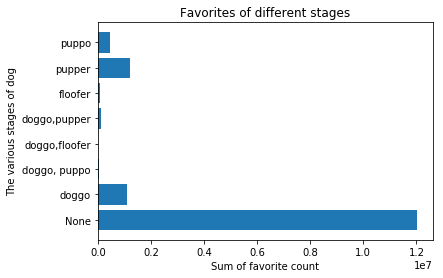

In [319]:
y_pos = np.arange(len(stage_count))

plt.barh(y_pos, stage_count.favorite_count.values)
plt.yticks(y_pos, stage_count.stage)
plt.title('Favorites of different stages')
plt.xlabel('Sum of favorite count')
plt.ylabel('The various stages of dog')
plt.show()

Text(0, 0.5, 'Sum of favorite count')

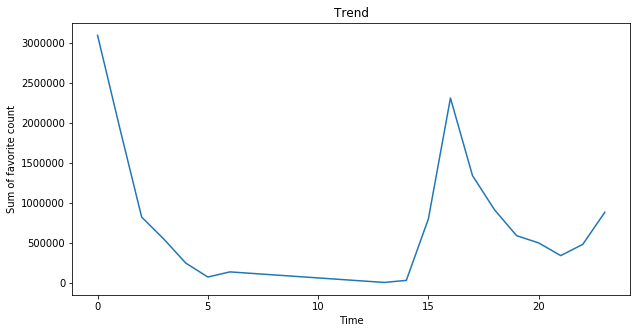

In [85]:
# Whether the posting time affects favorite count
plt.subplots(figsize=(10, 5))

plt.plot(master_df.groupby(master_df.created_at.dt.hour).favorite_count.sum())
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Sum of favorite count')